## DATA PREPARATION

In [40]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import scipy

pd.set_option('display.max_rows', 30)

In [41]:
# e.g. results/fidelity_eval_20_fps_substepping_1.json
path = "data/*.json"

data = []

for file_path in glob.glob(path):
    with open(file_path, "r") as f:
        file_path = file_path.replace(".json", "")

        # first int is fps second is substepping bool
        quality = "epic" if "epic" in file_path else "low"
        fps, _ = [int(value)
                  for value in file_path.split("_") if value.isdigit()]

        # print(f"{fps = }, {bool(substepping) = }")

        content = json.load(f)
        labels = content['labels']
        values = map(float, content['values'])
        data.append({

            'fps': fps,
            'quality': quality,
            # **dict(zip(labels, values)),
            'records': content['_checkpoint']['records']
        })


df = pd.DataFrame(data)

In [42]:
df

,fps,quality,records
0,10,low,"[{'index': 0, 'infractions': {'collisions_layo..."
1,10,epic,"[{'index': 0, 'infractions': {'collisions_layo..."
2,20,low,"[{'index': 0, 'infractions': {'collisions_layo..."
3,30,low,"[{'index': 0, 'infractions': {'collisions_layo..."
4,20,epic,"[{'index': 0, 'infractions': {'collisions_layo..."
5,30,epic,"[{'index': 0, 'infractions': {'collisions_layo..."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fps      6 non-null      int64 
 1   quality  6 non-null      object
 2   records  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes


In [44]:
df = df.explode('records', ignore_index=True)
# pd.json_normalize(df['records'])
df

,fps,quality,records
0,10,low,"{'index': 0, 'infractions': {'collisions_layou..."
1,10,low,"{'index': 1, 'infractions': {'collisions_layou..."
2,10,low,"{'index': 2, 'infractions': {'collisions_layou..."
3,10,low,"{'index': 3, 'infractions': {'collisions_layou..."
4,10,low,"{'index': 4, 'infractions': {'collisions_layou..."
...,...,...,...
163,30,epic,"{'index': 20, 'infractions': {'collisions_layo..."
164,30,epic,"{'index': 21, 'infractions': {'collisions_layo..."
165,30,epic,"{'index': 22, 'infractions': {'collisions_layo..."
166,30,epic,"{'index': 23, 'infractions': {'collisions_layo..."


In [45]:
record_df = pd.json_normalize(df['records'])
# record_df

In [46]:
# concatonate records data
df = pd.concat([df, record_df],  axis=1)

# drop original column
df = df.drop('records', axis=1)

# drop infractions columns

# remove prefices from column name
df.columns = df.columns.str.removeprefix('meta.')
df.columns = df.columns.str.removeprefix('scores.')
# df = df.rename(columns={"index": "route_index"})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fps                                168 non-null    int64  
 1   quality                            168 non-null    object 
 2   index                              168 non-null    int64  
 3   route_id                           168 non-null    object 
 4   status                             168 non-null    object 
 5   infractions.collisions_layout      168 non-null    object 
 6   infractions.collisions_pedestrian  168 non-null    object 
 7   infractions.collisions_vehicle     168 non-null    object 
 8   infractions.outside_route_lanes    168 non-null    object 
 9   infractions.red_light              168 non-null    object 
 10  infractions.route_dev              168 non-null    object 
 11  infractions.route_timeout          168 non-null    object 

In [48]:
# interesting_columns = ['fps', 'quality',
#                        'route_id', 'status', 'duration_game', 'duration_system', 'route_length', 'score_composed', 'score_penalty', 'score_route']
# df = df[interesting_columns]

df

,fps,quality,index,route_id,status,infractions.collisions_layout,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_dev,infractions.route_timeout,infractions.stop_infraction,infractions.vehicle_blocked,duration_game,duration_system,route_length,score_composed,score_penalty,score_route
0,10,low,0,RouteScenario_16,Completed,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,"[Agent ran a red light 159 at (x=-112.8, y=-10...",[],[],[],[],829.700012,1682.781150,1071.028134,28.619907,0.286199,100.000000
1,10,low,1,RouteScenario_16,Completed,[],[],[Agent collided against object with type=vehic...,[],[],[],[],[],[],707.000011,1417.550364,1071.028134,60.000000,0.600000,100.000000
2,10,low,2,RouteScenario_16,Completed,[],[],[],[],[],[],[],[],[],771.700011,1422.287662,1071.028134,100.000000,1.000000,100.000000
3,10,low,3,RouteScenario_17,Failed - Agent timed out,[],[],[],[],[],[],[Route timeout.],[],[],714.100011,831.435408,862.430089,78.987766,1.000000,78.987766
4,10,low,4,RouteScenario_17,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[],[],[],[Route timeout.],[],[],714.100011,819.948063,862.430089,34.326845,0.360000,95.352348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,30,epic,20,RouteScenario_22,Failed - Agent timed out,[],[],[],[],[],[],[Route timeout.],[],[],851.033378,4220.113310,991.758808,16.827768,1.000000,16.827768
164,30,epic,21,RouteScenario_23,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[],"[Agent ran a red light 26202 at (x=21.25, y=-7...",[],[Route timeout.],[],[],1067.033389,4777.455311,1271.907966,24.706883,0.252000,98.043187
165,30,epic,22,RouteScenario_23,Failed - Agent timed out,[],[],[],[],"[Agent ran a red light 26562 at (x=21.25, y=-7...",[],[Route timeout.],[],[],1067.033389,4574.816326,1271.907966,36.851844,0.700000,52.645491
166,30,epic,23,RouteScenario_23,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[],"[Agent ran a red light 26922 at (x=21.25, y=-7...",[],[Route timeout.],[],[],1067.033389,4692.282504,1271.907966,13.304596,0.252000,52.796015


In [49]:
df['route_index'] = df['route_id'].str.removeprefix("RouteScenario_")
df['route_index'] = pd.to_numeric(df['route_index'])
df['route_index'] -= df['route_index'].min()

### Params

- 7 scenarios
- 3 repetations
- 2 quality levels ('epic'/'low')
- 3 fps levels (10/20/30)

126 executions

In [50]:
# df = df.set_index(['fps', 'quality', 'route_id']).sort_index()
N_SCENARIOS = 7
df = df[df['route_index'] < 7]
df

,fps,quality,index,route_id,status,infractions.collisions_layout,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,...,infractions.route_timeout,infractions.stop_infraction,infractions.vehicle_blocked,duration_game,duration_system,route_length,score_composed,score_penalty,score_route,route_index
0,10,low,0,RouteScenario_16,Completed,[],[],[Agent collided against object with type=vehic...,[Agent went outside its route lanes for about ...,"[Agent ran a red light 159 at (x=-112.8, y=-10...",...,[],[],[],829.700012,1682.781150,1071.028134,28.619907,0.286199,100.000000,0
1,10,low,1,RouteScenario_16,Completed,[],[],[Agent collided against object with type=vehic...,[],[],...,[],[],[],707.000011,1417.550364,1071.028134,60.000000,0.600000,100.000000,0
2,10,low,2,RouteScenario_16,Completed,[],[],[],[],[],...,[],[],[],771.700011,1422.287662,1071.028134,100.000000,1.000000,100.000000,0
3,10,low,3,RouteScenario_17,Failed - Agent timed out,[],[],[],[],[],...,[Route timeout.],[],[],714.100011,831.435408,862.430089,78.987766,1.000000,78.987766,1
4,10,low,4,RouteScenario_17,Failed - Agent timed out,[],[],[Agent collided against object with type=vehic...,[],[],...,[Route timeout.],[],[],714.100011,819.948063,862.430089,34.326845,0.360000,95.352348,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,30,epic,16,RouteScenario_21,Completed,[],[],[Agent collided against object with type=vehic...,[],[],...,[],[],[],303.500016,1283.936951,531.077514,60.000000,0.600000,100.000000,5
160,30,epic,17,RouteScenario_21,Completed,[],[],[],[],[],...,[],[],[],343.266685,1461.186184,531.077514,100.000000,1.000000,100.000000,5
161,30,epic,18,RouteScenario_22,Completed,[],[],[Agent collided against object with type=vehic...,[],"[Agent ran a red light 25317 at (x=-38.65, y=1...",...,[],[],[],572.666697,2458.644687,991.758808,42.000000,0.420000,100.000000,6
162,30,epic,19,RouteScenario_22,Completed,[],[],[],[],"[Agent ran a red light 25618 at (x=-38.65, y=1...",...,[],[],[],437.700023,1814.015018,991.758808,70.000000,0.700000,100.000000,6


# Q1: How does fidelity settings affect executi<on time

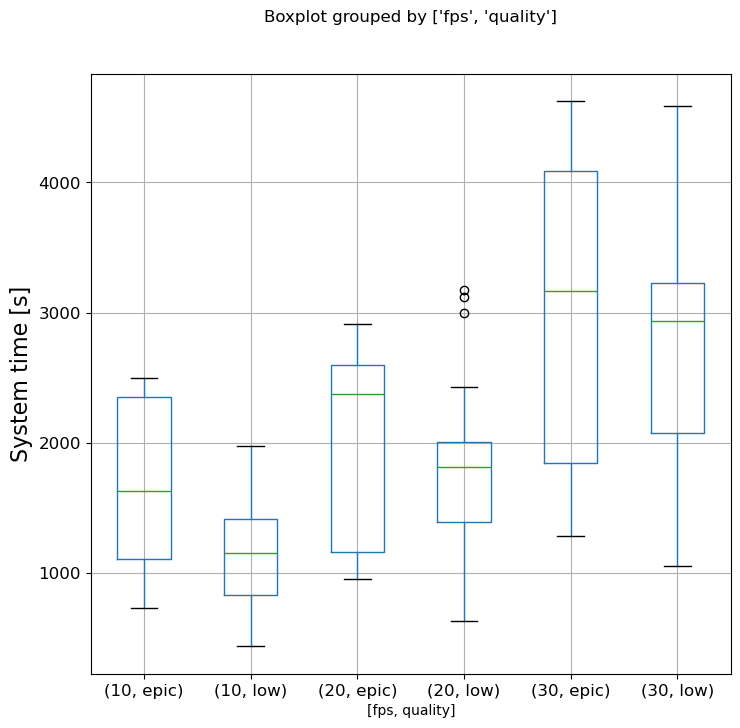

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))

axes = df.boxplot(column=['duration_system',],
                  by=['fps', 'quality'], ax=ax)

axes.set_title("")
axes.set_ylabel("System time [s]", fontsize=16)
axes.tick_params(axis='both', labelsize=12)
# axes[1].set_title("Game time [s]")

# plt.tight_layout()

### Conclusions:

Yay lower quality lower execution time

Lower FPS lower execution time

### Q1.1 Does quality affect execution time?

Text(0.5, 1.0, 'System time [s]')

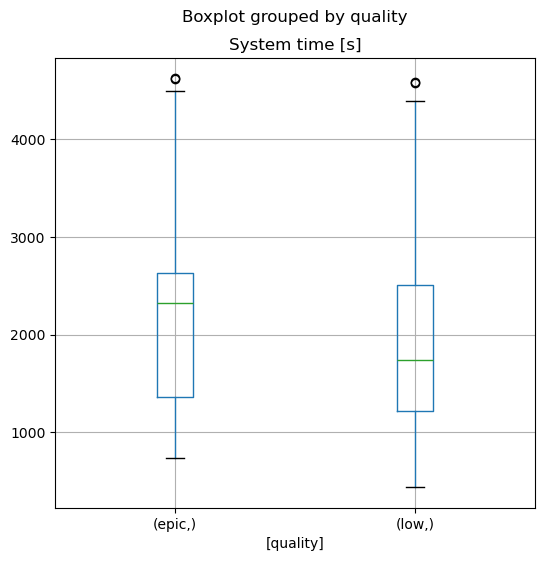

In [52]:
size = 6
fig, ax = plt.subplots(figsize=(size, size))

axes = df.boxplot(column=['duration_system'],
                  by=['quality'], ax=ax)

axes.set_title("System time [s]")

In [53]:
df[['quality', 'duration_system']].groupby('quality').mean()

,duration_system
quality,
epic,2240.271880
low,1935.550502


### Q1.2 Does FPS affect execution time?

Text(0.5, 1.0, 'System time [s]')

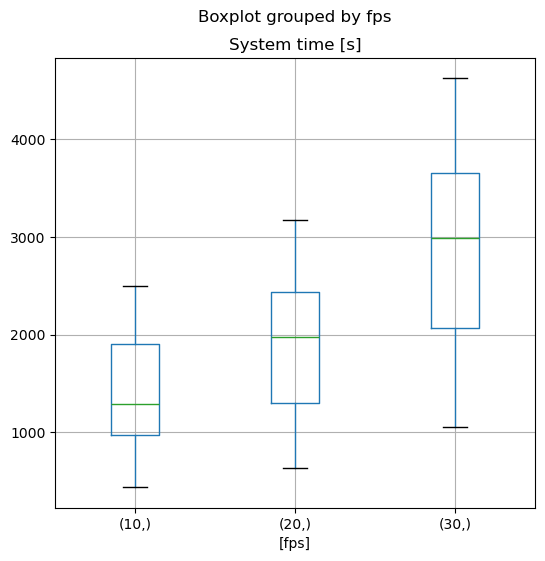

In [54]:
size = 6
fig, ax = plt.subplots(figsize=(size, size))

axes = df.boxplot(column=['duration_system'],
                  by=['fps'], ax=ax)

axes.set_title("System time [s]")

In [55]:
means = df[['fps', 'duration_system']].groupby('fps').mean()
low_fps = means.loc[10, 'duration_system']
baseline_fps = means.loc[20, 'duration_system']
high_fps = means.loc[30, 'duration_system']


def percentage_smaller(smaller, larger):
    return ((smaller / larger) * 100) - 100


print(
    f"The 10FPS is {percentage_smaller(low_fps,baseline_fps):.2f}% smaller than the baseline 20FPS.")

print(
    f"The 30FPS is {percentage_smaller(high_fps, baseline_fps):.2f}% bigger than the baseline 20FPS.")

means

The 10FPS is -27.40% smaller than the baseline 20FPS.
The 30FPS is 49.90% bigger than the baseline 20FPS.


,duration_system
fps,
10,1410.111572
20,1942.252524
30,2911.369478


### Conclusions: 

substepping doesnt reduce execution time significantly

# Q2: How does fidelity settings affect ADS performance (score_composed, score_penalty, score_route)

/tmp/ipykernel_1336032/3498353464.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df.boxplot(column=['score_route', 'score_composed'],


<Axes: title={'center': 'score_penalty'}, xlabel='fps'>

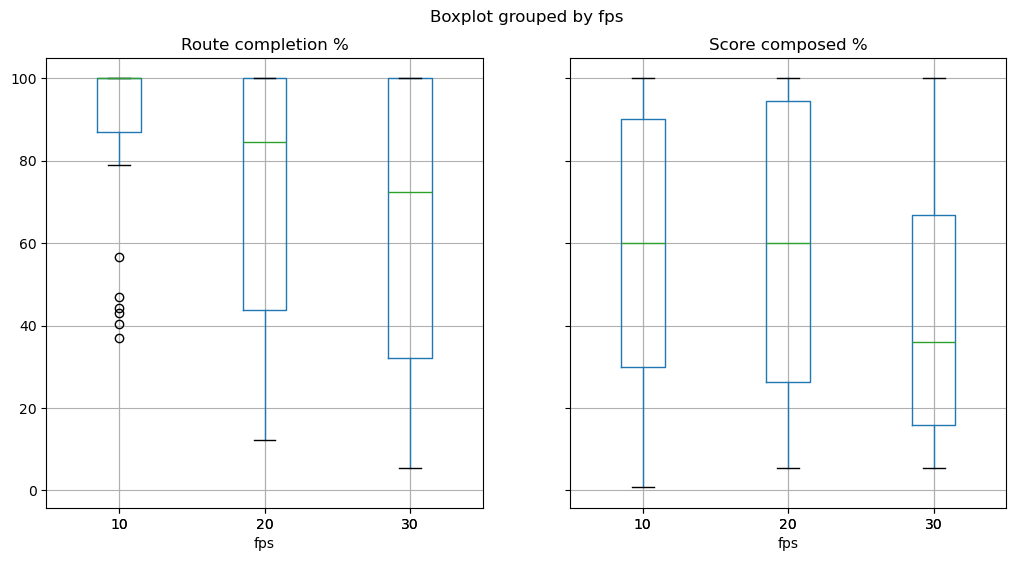

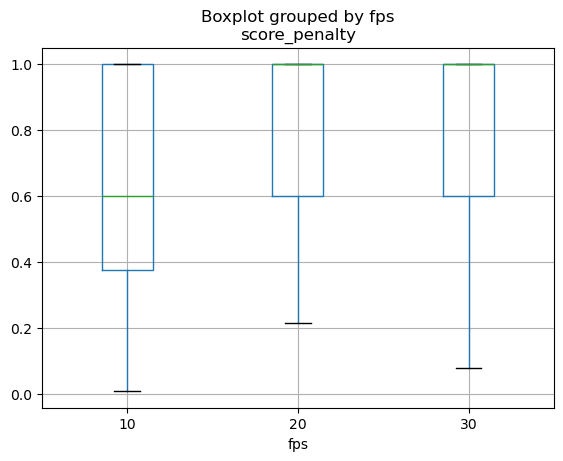

In [56]:
size = 6
fig, ax = plt.subplots(figsize=(size*2, size))

axes = df.boxplot(column=['score_route', 'score_composed'],
                  by='fps', ax=ax)

axes[0].set_title("Route completion %")
axes[1].set_title("Score composed %")


df.boxplot(column=['score_penalty'],
           by='fps')

### Conclusions

- At 10FPS car gets more penaulties, but has higher route complition rate
- Probably time out issues, so when lovering the 10FPS we need to adjust timeout criteria.
-  At 10FPS car has efectevly less time to make mistakes?


### Q2.2 Does quality affect ADS performance?

/tmp/ipykernel_1336032/2091460531.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = df.boxplot(column=['score_route', 'score_composed'],


<Axes: title={'center': 'score_penalty'}, xlabel='quality'>

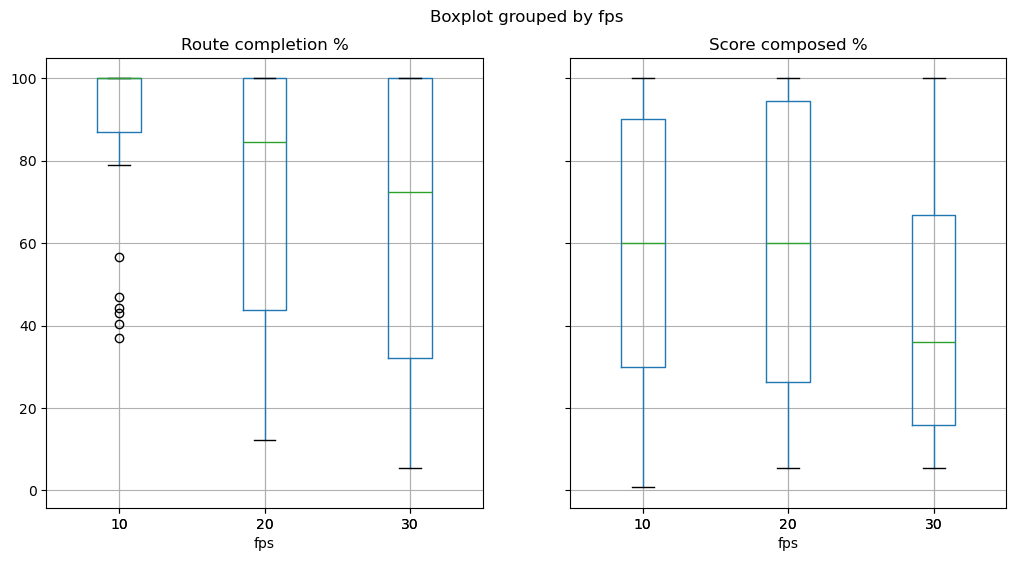

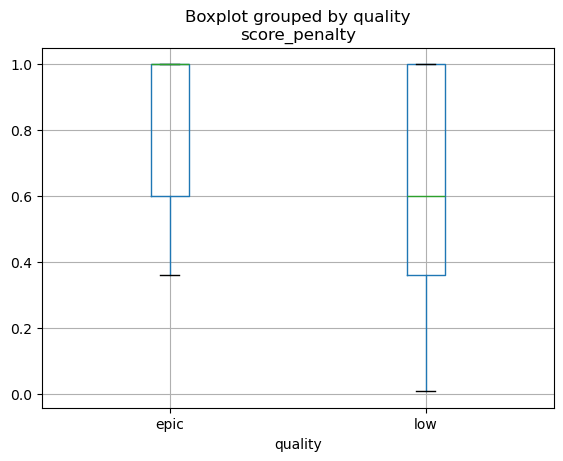

In [57]:
size = 6
fig, ax = plt.subplots(figsize=(size*2, size))

axes = df.boxplot(column=['score_route', 'score_composed'],
                  by='fps', ax=ax)

axes[0].set_title("Route completion %")
axes[1].set_title("Score composed %")


df.boxplot(column=['score_penalty'],
           by='quality')

## Conclusions

With better quality, car has less penaulties -> driving better

# Q3: Does the change fidelity params affect the bhaviour of ADS (and how)

Per scenario analysis

In [58]:
SCENARIO_ID = 2  # enter from 0 to 6 (we don't have more data)

scen_df = df[df['route_index'] == SCENARIO_ID]
interesting_columns = ['route_id', 'fps', 'quality', 'status', 'infractions.collisions_pedestrian', 'infractions.collisions_vehicle',
                       'infractions.outside_route_lanes', 'infractions.red_light', 'infractions.route_timeout']

scen_df = scen_df[interesting_columns].sort_values(
    by=['fps', 'quality']).reset_index(drop=True)
scen_df

,route_id,fps,quality,status,infractions.collisions_pedestrian,infractions.collisions_vehicle,infractions.outside_route_lanes,infractions.red_light,infractions.route_timeout
0,RouteScenario_18,10,epic,Failed - Agent timed out,[],[Agent collided against object with type=vehic...,[],[],[Route timeout.]
1,RouteScenario_18,10,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
2,RouteScenario_18,10,epic,Failed - Agent got blocked,[],[Agent collided against object with type=vehic...,[],[],[]
3,RouteScenario_18,10,low,Failed - Agent timed out,[],[Agent collided against object with type=vehic...,[],[],[Route timeout.]
4,RouteScenario_18,10,low,Completed,[],[Agent collided against object with type=vehic...,[],[],[]
5,RouteScenario_18,10,low,Completed,[],[],[],[],[]
6,RouteScenario_18,20,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
7,RouteScenario_18,20,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
8,RouteScenario_18,20,epic,Failed - Agent timed out,[],[],[],[],[Route timeout.]
9,RouteScenario_18,20,low,Failed - Agent timed out,[],[],[],[],[Route timeout.]


# Final conclusions

I think its worth to use 10FPS, for MF Fusion